In [8]:
# case fatality rate

In [9]:
import argparse
import os
import pickle
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *
%load_ext autoreload
%autoreload 2

data_dir = '../../data'
country = pd.read_csv(os.path.join(data_dir, 'COVID_Cases_Restricted_Detailed_12312020.csv'), parse_dates=['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'cdc_case_earliest_dt'])


print('all cases', country.shape)
percent_missing = country.isnull().sum() * 100 / len(country)
percent_missing
#df = country[country['current_status']=='Laboratory-confirmed case']
#df = country.copy()
#print(df.shape)

min_date = pd.Timestamp('2020-04-01')
max_date = pd.Timestamp('2020-12-01')

test()
time = "cdc_case_earliest_dt"



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
all cases (13415838, 32)
test import


In [10]:
# should we include probable case??
time = 'cdc_case_earliest_dt'
df = country[country['current_status']=='Laboratory-confirmed case']
#percent_missing = df.isnull().sum() * 100 / len(df)
#print('before:', percent_missing)

if False: # takes time to inpute 'pos_spec_dt'
    time = 'pos_spec_dt'
    df[time] = df.apply(lambda r: r[time] if not pd.isnull(r[time])
                            else (r['cdc_case_earliest_dt']), axis=1)
    #pd.to_csv(os.path.joint(data_dir, 'country_positive_test'.csv), index=False)
    df.to_csv(os.path.join(data_dir, 'country_positive_test.csv'), index=False)


#df = pd.read_csv(os.path.join(data_dir, 'country_positive_test.csv'), parse_dates=['pos_spec_dt', 'cdc_case_earliest_dt'])

# rename age_groups
print("pos inputed missingness")
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)
df['age_group'] = df['age_group'].astype('category')
df['age_group'].cat.categories
df.loc[df['age_group'].isnull(), 'age_group'] = 'Unknown'
df['age_group'].cat.rename_categories({'Unknown': '_' + 'Unknown'}, inplace=True)
df['age_group'].cat.categories

#df['age_group']
df['age_group'].cat.rename_categories({'0 - 9 Years':'0-9', 
                                       '10 - 19 Years':'10-19',
                                       '20 - 29 Years':'20-29',
                                       '30 - 39 Years':'30-39',
                                       '40 - 49 Years':'40-49', 
                                       '50 - 59 Years':'50-59',
                                       '60 - 69 Years':'60-69',
                                       '70 - 79 Years':'70-79',
                                       '80+ Years':'80+'}, inplace=True)
df.loc[df['res_state']=='NYC', 'res_state'] = 'NY'


pos inputed missingness
race_ethnicity_combined     2.220655
current_status              0.000000
cdc_case_earliest_dt        0.000000
cdc_report_dt               9.636009
sex                         0.723504
onset_dt                   53.383946
pos_spec_dt                68.807553
hosp_yn                     0.000000
icu_yn                      0.000000
death_yn                    0.000000
hc_work_yn                  2.591898
pna_yn                      0.000000
abxchest_yn                 0.061430
acuterespdistress_yn        0.000000
mechvent_yn                 0.000000
fever_yn                    0.000000
sfever_yn                   0.000000
chills_yn                   0.000000
myalgia_yn                  0.000000
runnose_yn                  0.000000
sthroat_yn                  0.000000
cough_yn                    0.000000
sob_yn                      0.000000
nauseavomit_yn              0.000000
headache_yn                 0.000000
abdom_yn                    0.000000
diarrhea_yn   

In [11]:
df['null'] = df['pos_spec_dt'].isnull()
nd = df[df['res_state']!='Unknown'].groupby('res_state')['null'].mean().reset_index()
nd['half'] = (nd['null'] >= 0.9)
nd['half'].mean()
#nd

0.6071428571428571

a# Percent of missingness

In [4]:
print(df[df['res_state']=='FL'].isnull().sum()/len(df[df['res_state']=='FL']))


race_ethnicity_combined    0.009579
current_status             0.000000
cdc_case_earliest_dt       0.000000
cdc_report_dt              0.000000
sex                        0.004196
onset_dt                   0.552331
pos_spec_dt                0.999314
hosp_yn                    0.000000
icu_yn                     0.000000
death_yn                   0.000000
hc_work_yn                 0.009607
pna_yn                     0.000000
abxchest_yn                0.000000
acuterespdistress_yn       0.000000
mechvent_yn                0.000000
fever_yn                   0.000000
sfever_yn                  0.000000
chills_yn                  0.000000
myalgia_yn                 0.000000
runnose_yn                 0.000000
sthroat_yn                 0.000000
cough_yn                   0.000000
sob_yn                     0.000000
nauseavomit_yn             0.000000
headache_yn                0.000000
abdom_yn                   0.000000
diarrhea_yn                0.000000
medcond_yn                 0

In [13]:
# hosp
df.loc[df['hosp_yn']!='Yes', 'hosp_yn'] = 0
df.loc[df['hosp_yn']=='Yes', 'hosp_yn'] = 1


# death
df.loc[df['death_yn']!='Yes', 'death_yn'] = 0
df.loc[df['death_yn']=='Yes', 'death_yn'] = 1



print(df['age_group'].value_counts())
print(df['hosp_yn'].value_counts())
print(df['death_yn'].value_counts())


cleaned_country = df.rename(columns={'age_group':'Age_group', 
                                    'sex': 'Gender',
                                    'hosp_yn': 'Hospitalized',
                                    'death_yn': 'Died',
                                    'current_status': 'Case'})
cleaned_country['Case'] = 1

#### se;lect  the date to use

time = 'cdc_case_earliest_dt'
cleaned_country.sort_values(by=time, inplace=True)
print(cleaned_country.columns)
florida = cleaned_country.copy()
florida = florida[['cdc_case_earliest_dt', 'Gender', 'onset_dt', 'pos_spec_dt', 'Hospitalized',  'Died', 'res_state', 'Age_group']]
florida.columns
#max_date = florida[time].max()
#min_date = florida[time].min()

20-29       2410813
30-39       2061610
40-49       1879917
50-59       1813615
60-69       1280166
10-19       1261363
70-79        711636
80+          538037
0-9          485285
_Unknown      95436
Name: age_group, dtype: int64
0    11848966
1      688912
Name: hosp_yn, dtype: int64
0    12315303
1      222575
Name: death_yn, dtype: int64
Index(['race_ethnicity_combined', 'Case', 'cdc_case_earliest_dt',
       'cdc_report_dt', 'Gender', 'onset_dt', 'pos_spec_dt', 'Hospitalized',
       'icu_yn', 'Died', 'hc_work_yn', 'pna_yn', 'abxchest_yn',
       'acuterespdistress_yn', 'mechvent_yn', 'fever_yn', 'sfever_yn',
       'chills_yn', 'myalgia_yn', 'runnose_yn', 'sthroat_yn', 'cough_yn',
       'sob_yn', 'nauseavomit_yn', 'headache_yn', 'abdom_yn', 'diarrhea_yn',
       'medcond_yn', 'county_fips_code', 'res_county', 'res_state',
       'Age_group', 'null'],
      dtype='object')


Index(['cdc_case_earliest_dt', 'Gender', 'onset_dt', 'pos_spec_dt',
       'Hospitalized', 'Died', 'res_state', 'Age_group'],
      dtype='object')

# Not by age group

In [14]:
plt.rcParams['figure.figsize'] = [5.5, 4]
SMALL_SIZE = 10.5
MEDIUM_SIZE = 11
MEDIUM_Plus= 11.5
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_Plus)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# twelve states with most cases


(12536042, 9)


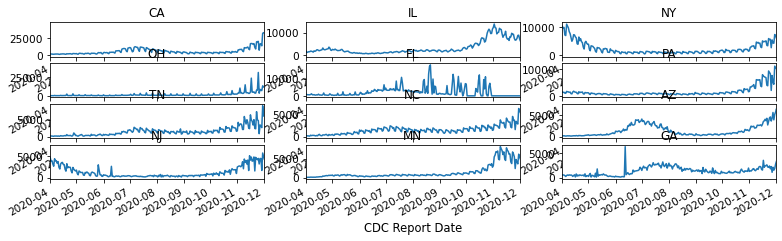

In [26]:
plt.close()
florida['all'] = 1

stat_l = florida.groupby('res_state').count().sort_values(by='all', ascending=False).index[:12].tolist()
st = 'res_state'
ns = ['OCONUS', 'Unkown']
#florida[st].unique()

df = florida
df = df[~(df[st].isin(ns)) & df[st].notna()]
#len(df)
len(df[st].unique())
print(df.shape)
num = 3

fig, ax = plt.subplots(4,num)
florida[florida['res_state']=='IL']
#plt.rcParams['figure.figsize'] = [24, 50]
#sts = ['CT','IL','NJ']
sts = stat_l
plt.rcParams.update({'figure.figsize':[13, 12.8]})

for i, s in enumerate(sts):
    #if i%6 == 0:
        r = int(i / num)
        c = i % num
        d = df[df[st]==s][[time, 'all']].set_index(time)
        ax[r][c].set_title(s)
        
        p = d.groupby(time)['all'].sum().plot(ax=ax[r][c], legend=False)
        graph_leg_acc(p, '{}'.format(sts[i]))
        ax[r][c].set_xlabel("")

ax[3][1].set_xlabel("CDC Report Date")
plt.tight_layout() 
plt.savefig('cdc_img/topcases_states.svg')
#plt.close()

In [16]:
# time, covid



# Three excluded states

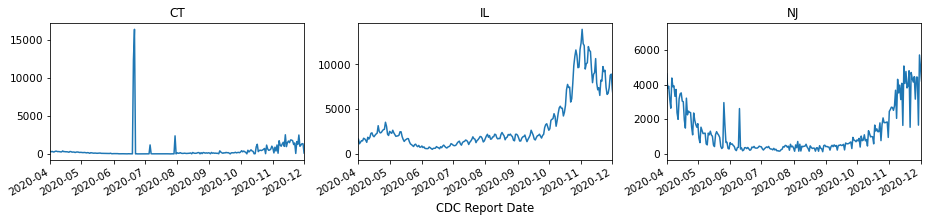

In [22]:
florida['all'] = 1
df = florida.copy()
fig, ax = plt.subplots(1,num)
sts = ['CT','IL','NJ']
plt.rcParams.update({'figure.figsize':[13, 3.2]})

for i, s in enumerate(sts):
    r = int(i / num)
    c = i % num
    d = df[df[st]==s][[time, 'all']].set_index(time)
    ax[i].set_title(s)

    p = d.groupby(time)['all'].sum().plot(ax=ax[i], legend=False)
    graph_leg_acc(p, '{}'.format(sts[i]))
    ax[i].set_xlabel("")

ax[1].set_xlabel("CDC Report Date")
plt.tight_layout() 
plt.savefig('cdc_img/exclude_states.svg')

# Cases, hospitalizations and deaths

In [18]:
florida[time].isna()

4971599     False
9491908     False
12898013    False
6490657     False
5777226     False
            ...  
6021175     False
9717258     False
2954475     False
4849570     False
13126110    False
Name: cdc_case_earliest_dt, Length: 12537878, dtype: bool

In [19]:
florida.columns

Index(['cdc_case_earliest_dt', 'Gender', 'onset_dt', 'pos_spec_dt',
       'Hospitalized', 'Died', 'res_state', 'Age_group', 'all'],
      dtype='object')

max date: 2020-12-01 00:00:00


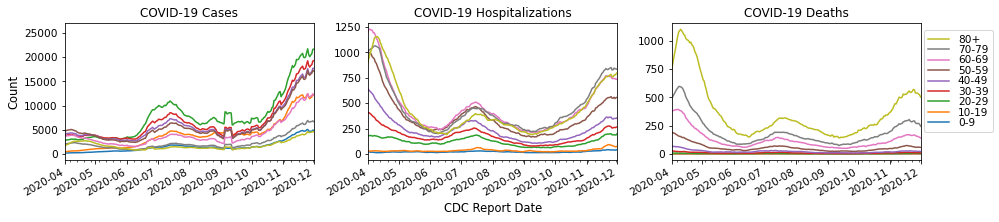

In [20]:
#florida = florida[~florida['res_state'].isin(['CT','IL','NJ'])]
import matplotlib.ticker as ticker
from matplotlib import dates
from utils import *
plt.rcParams['figure.figsize'] = [13, 3.2]
#max_date = florida['Case_'].max()
print("max date:", max_date)

    
florida['all'] = 1
vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
#vrs = ['Hospitalized']
lbs = ['COVID-19 Cases','COVID-19 Hospitalizations', 'COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time='cdc_case_earliest_dt'
florida.sort_values(by=time, inplace=True)
newdf = florida#[~florida['res_state'].isin(['CT','IL','NJ'])]#[florida['res_state']=='FL']
# print(newdf.dtypes)
#newdf['Case_'] = pd.to_datetime(newdf['Case_'], format="%m/%d/%Y")
#newdf['Case_'] = newdf['Case_']
florida[time] = florida[time].astype('datetime64[ns]')

newdf.dtypes
fig, ax = plt.subplots(1,3)



for i, v in enumerate(vrs):
    amt=v
   # pdb.set_trace()
    df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
    #pdb.set_trace()
    
    ylb = 'Count' if i==0 else ''
    xlb = 'CDC Report Date' if i==1 else ''
    df = df[df[grpvar]!='_Unknown']
    df[grpvar].cat.remove_unused_categories(inplace=True)

    #df = df[(df.index>=pd.Timestamp('2020-03-12')) & (df.index<=pd.Timestamp('2020-09-15'))]
    
    df['rolling sum'].fillna(0, inplace=True)
    #if v == 'Hospitalized':
    #    df.to_csv('hosp_country')
    p = df.groupby(grpvar)['rolling sum'].plot(ylabel=ylb, xlabel=xlb, ax=ax[i])
    #ax[i] = 
    graph_leg(p, '{}'.format(lbs[i]))
    #ax[i].set_xticklabels(map(lambda x: line_format(x), df.index))
   # ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    


   # axes[0] = p[0]
handles, labels = ax[2].get_legend_handles_labels()
#fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
plt.tight_layout()
fig.legend(reversed(handles), reversed (labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('cases.svg'), bbox_inches='tight')

    


In [21]:
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df = df[df[grpvar]!='_Unknown']
dates = ['2020-04-15', '2020-07-15', '2020-12-01']

#df.loc[dates]
for i, d in enumerate(dates):
    print('d:', d)
    dat = df.loc[d].groupby('Age_group')['rolling sum'].sum().reset_index() 
    dat['cum sum'] = dat['rolling sum'].cumsum()
    print('median:', df.loc[d]['rolling sum'].sum()/2)
    print(dat)

d: 2020-04-15
median: 11916.285714285714
  Age_group  rolling sum       cum sum
0       0-9   249.714286    249.714286
1     10-19   676.142857    925.857143
2     20-29  2947.857143   3873.714286
3     30-39  3610.428571   7484.142857
4     40-49  3822.285714  11306.428571
5     50-59  4337.285714  15643.714286
6     60-69  3428.857143  19072.571429
7     70-79  2138.428571  21211.000000
8       80+  2621.571429  23832.571429
9  _Unknown     0.000000  23832.571429
d: 2020-07-15
median: 23419.214285714286
  Age_group   rolling sum       cum sum
0       0-9   1840.142857   1840.142857
1     10-19   4736.571429   6576.714286
2     20-29  10569.857143  17146.571429
3     30-39   8387.000000  25533.571429
4     40-49   7209.857143  32743.428571
5     50-59   6403.714286  39147.142857
6     60-69   4065.714286  43212.857143
7     70-79   2164.142857  45377.000000
8       80+   1461.428571  46838.428571
9  _Unknown      0.000000  46838.428571
d: 2020-12-01
median: 58203.42857142857
  Age_gro

In [23]:
#florida[florida['res_state'].isin(['CT','IL','NJ'])]

In [24]:
florida


cdc_case_earliest_dt  Gender   onset_dt pos_spec_dt Hospitalized  \
4971599            1960-09-29    Male 2020-11-24         NaT            1   
9491908            2018-09-24    Male        NaT         NaT            0   
12924630           2020-01-01  Female 2020-01-01         NaT            0   
7743752            2020-01-01    Male 2020-01-01         NaT            0   
9560729            2020-01-01    Male 2020-01-01         NaT            0   
...                       ...     ...        ...         ...          ...   
392883             2020-12-16  Female 2020-12-16         NaT            0   
3514240            2020-12-16    Male 2020-12-16         NaT            0   
3671313            2020-12-16    Male        NaT         NaT            0   
1863243            2020-12-16  Female        NaT         NaT            0   
13126110           2020-12-16  Female 2020-12-16         NaT            0   

         Died res_state Age_group  all  
4971599     0        CA     50-59    1  
9491908     0        WI     30-39    1  
12924630    0        FL     50-59    1  
7743752     0        TX       0-9    1  
9560729     0        NJ     40-49    1  
...       ...       ...       ...  ...  
392883      0        MI     50-59    1  
3514240     0        MI     60-69    1  
3671313     0        OK     30-39    1  
1863243     0        CA     30-39    1  
13126110    0        SC     70-79    1  

[12537878 rows x 9 columns]

DatetimeIndex(['1960-09-29', '1960-09-30', '1960-10-01', '1960-10-02',
               '1960-10-03', '1960-10-04', '1960-10-05', '1960-10-06',
               '1960-10-07', '1960-10-08',
               ...
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16'],
              dtype='datetime64[ns]', name='cdc_case_earliest_dt', length=21994, freq=None)
DatetimeIndex(['1960-09-29', '1960-09-30', '1960-10-01', '1960-10-02',
               '1960-10-03', '1960-10-04', '1960-10-05', '1960-10-06',
               '1960-10-07', '1960-10-08',
               ...
               '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16'],
              dtype='datetime64[ns]', name='cdc_case_earliest_dt', length=21994, freq=None)
DatetimeIndex(['1960-09-29', '1960-0

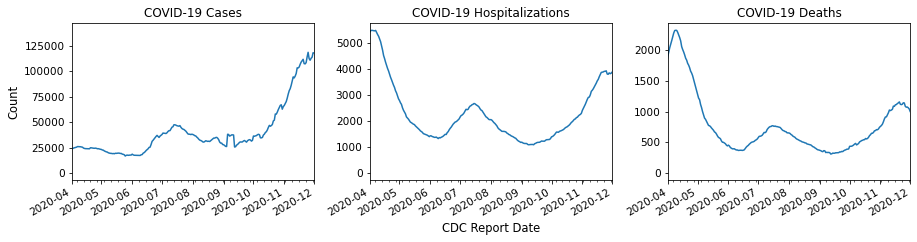

In [25]:
from matplotlib import dates

plt.rcParams['figure.figsize'] = [13, 3.2]

florida['all'] = 1
vrs = ['all',  'Hospitalized','Died'] # 'Died'
lbs = ['COVID-19 Cases', 'COVID-19 Hospitalizations','COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time='cdc_case_earliest_dt'
newdf = florida#[florida['res_state']=='FL']

fig, ax = plt.subplots(1,3)
dfs = []
for i, v in enumerate(vrs):
    amt=v
    df = get_rolling_df(newdf, time, freq=7, var=amt)
    dfs.append(df)

    print(df.index)
    ylb = 'Count' if i==0 else ''
    xlb = 'CDC Report Date' if i==1 else ''
    p = df[amt].plot(ylabel=ylb, xlabel=xlb, ax=ax[i], legend=False)
    #ax[i] = 
    graph_leg_acc(p, '{}'.format(lbs[i]))
   # axes[0] = p[0]
#handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
#fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('cases_acc.svg'), bbox_inches='tight')


In [27]:
df[:3]

cdc_case_earliest_dt  Gender   onset_dt pos_spec_dt Hospitalized  \
4971599            1960-09-29    Male 2020-11-24         NaT            1   
9491908            2018-09-24    Male        NaT         NaT            0   
12924630           2020-01-01  Female 2020-01-01         NaT            0   

         Died res_state Age_group  all  
4971599     0        CA     50-59    1  
9491908     0        WI     30-39    1  
12924630    0        FL     50-59    1

In [28]:
df = get_rolling_df(newdf, time, freq=7, var='all')

num = df[(df.index>='2020-11-01')&(df.index<='2020-12-01')]["all"].sum()
total = df[(df.index>='2020-04-01')&(df.index<='2020-12-01')]["all"].sum()
print("last:{}, total:{}, ratio:{}".format(num, total, num/total))

last:3068493.7142857136, total:9881228.714285715, ratio:0.31053766722851595


In [29]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [30]:
dates = ["2020-04-15", "2020-07-15", "2020-12-01"] #1, 2, 3
cts = []
for i, v in enumerate(vrs):
     df = get_rolling_df(newdf, time, freq=7, var=v)
     cts.append(df.loc[dates])
     print(df.loc[dates])
     

                                all
cdc_case_earliest_dt               
2020-04-15             23962.571429
2020-07-15             47037.428571
2020-12-01            117810.000000
                      Hospitalized
cdc_case_earliest_dt              
2020-04-15             4529.857143
2020-07-15             2680.142857
2020-12-01             3892.714286
                             Died
cdc_case_earliest_dt             
2020-04-15            2060.142857
2020-07-15             770.571429
2020-12-01             999.428571


In [101]:
new_df = florida[florida[st]=='TX']
df = get_rolling_df(new_df, time, freq=7, var='all')
df[(df.index>=min_date) & (df.index<=max_date)]['all'].sum()

#new_df[:3]


58012.857142857145

In [63]:
df = get_rolling_df(newdf, time, freq=7, var='all')
print(df[(df.index>='2020-04-01') & (df.index<='2020-04-15')]['all'].sum())

df = get_rolling_df(florida[florida[st]=='NY'], time, freq=7, var='all')
print(df[(df.index>='2020-04-01') & (df.index<='2020-04-15')]['all'].sum())



374583.71428571426
129497.42857142855


In [64]:
129497.42857142855/374583.71428571426


0.34571024748997553

In [105]:
new_df = florida[florida[st]=='TX']
#df = get_rolling_df(new_df, time, freq=7, var='Hospitalized')
df = new_df
df[(df[time]>=min_date) & (df[time]<=max_date)]['Hospitalized'].sum()

14

In [102]:
new_df = florida[florida[st]=='TX']
df = get_rolling_df(new_df, time, freq=7, var='Died')
df[(df.index>=min_date) & (df.index<=max_date)]['Died'].sum()


3.0

In [106]:
new_df = florida[florida[st]=='FL']
#df = get_rolling_df(new_df, time, freq=7, var='Hospitalized')
df = new_df
df[(df[time]>=min_date) & (df[time]<=max_date)]['all'].sum()

544915

# Collect CFR, HFR, CFR

In [98]:
max_date

Timestamp('2020-12-01 00:00:00')

df1 (219940, 3)


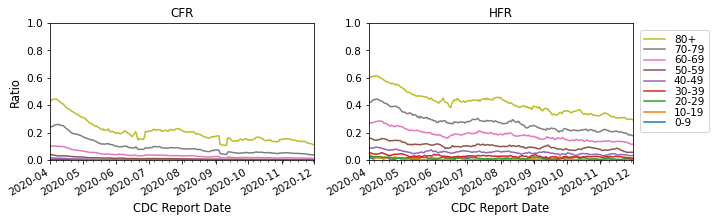

In [35]:
from matplotlib import dates

fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [9, 3.2]

grpvar='Age_group'
freq='7D'
amt="Died"
time=time
newdf = florida[florida['Hospitalized'] ==1].copy()

# HFR
df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
df1 = df.copy()
df1['Died'] = df1['rolling sum']
print("df1", df1.shape)
# get hospitalized
df= get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df
df2['Hospitalized'] = df2['rolling sum']

df3 = df1
df3['Hospitalized'] = df2['Hospitalized']
df3['HFR'] = df3['Died'] / df3['Hospitalized']

df3['HFR'].fillna(0, inplace=True)
df3 = df3[df3[grpvar]!='_Unknown']
df3[grpvar].cat.remove_unused_categories(inplace=True)

p = df3.groupby(grpvar)['HFR'].plot(legend=False, ax=ax[1])
p[0].set_xlabel("")
graph_leg(p, 'HFR')

####merge
newdf = florida
newdf['all'] = 1
# all died
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Died', time)
df1 = df.copy()
df1['Died'] = df1['rolling sum']
# all hosp
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df.copy()
df2['Hospitalized'] = df2['rolling sum']
#all
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df['all'] = df['rolling sum']
df = df[[grpvar, 'all']].merge(df1[[grpvar, 'Died']], on=[time, grpvar], how='outer')
df = df[[grpvar, 'all', 'Died']].merge(df2[[grpvar, 'Hospitalized']], on=[time, grpvar], how='outer')
df[['Died', 'Hospitalized']].fillna(0, inplace=True)
##########CFR
df['CFR'] = df['Died']/df['all']
df = df[df[grpvar]!='_Unknown']
df[grpvar].cat.remove_unused_categories(inplace=True)
p = df.groupby(grpvar)['CFR'].plot(legend=False, ax=ax[0])

fig = p[0].get_figure()
graph_leg(p, 'CFR')
p[0].set_xlabel("")
ax[1].set_title('HFR')
ax[0].set_ylim(0.0, 0.5)
ax[0].set_ylabel('Ratio')
ax[1].set_xlabel('CDC Report Date')
for i in range(2):
    ax[i].set_ylim(0, 1)
    
for i in range(2):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
    ax[i].set_xlabel('CDC Report Date')

handles, labels = ax[1].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.1,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('CFR_HFR.svg'), bbox_inches='tight')


# hosp / covid

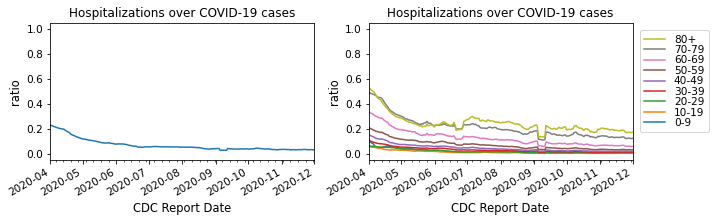

In [36]:
plt.rcParams['figure.figsize'] = [9, 3.2]
fig, ax = plt.subplots(1,2)

newdf = florida
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df.copy()
df2['Hospitalized'] = df2['rolling sum']
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df['all'] = df['rolling sum']
df = df[[grpvar, 'all']].merge(df2[[grpvar, 'Hospitalized']], on=[time, grpvar], how='outer')
df['Hosp_all'] = df['Hospitalized']/df['all']
df = remove_unkown(df, grpvar)
p = df.groupby(grpvar)['Hosp_all'].plot( legend=False, ax=ax[1])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
graph_leg(p, 'Hospitalizations over COVID-19 cases')
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.1,0.85),borderaxespad=0.)


ax[1].set_ylabel('ratio')
ax[1].set_xlabel('CDC Report Date')
newdf = florida
df = get_rolling_df(newdf, time, freq=7, var='Hospitalized')
df2 = df.copy()
df = get_rolling_df(newdf, time, freq=7, var='all')
df = df[['all']].merge(df2[['Hospitalized']], on=[time], how='outer')
df['Hosp_all'] = df['Hospitalized']/df['all']
p = df['Hosp_all'].plot( legend=False, ax=ax[0])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
graph_leg_acc(p, 'Hospitalizations over COVID-19 cases')
ax[0].set_ylabel('ratio')
ax[0].set_xlabel('CDC Report Date')

for i in range(2):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
plt.tight_layout()
fig.savefig('img_country/{}'.format('hosp_over_covid.svg'), bbox_inches='tight')


# Top five vs. the rest barplots

In [37]:
florida.columns

Index(['cdc_case_earliest_dt', 'Gender', 'onset_dt', 'pos_spec_dt',
       'Hospitalized', 'Died', 'res_state', 'Age_group', 'all'],
      dtype='object')

In [38]:
st = 'res_state'
top5 = florida[(florida[time]>=min_date) & (florida[time]<=max_date)].groupby(st).sum().sort_values(by='all')[-5:].reset_index()[st].tolist()#nlargest(5)

florida['state'] = florida[st].apply(lambda s: s if s in top5  else 'Other').astype('category')

In [39]:
def get_bar_chart(amt, newdf, time, name, ax, it, grpvar='Age_group'):
    min_date = "2020-04-01"
    max_date = "2020-12-01"
    #grpvar = 'state'
    freq = '7D'
    df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
    df[amt] = df['rolling sum']
    daily = get_rolling_df(newdf, time=time, freq=7, var=amt)
    daily[amt].fillna(0, inplace=True)
    daily.rename(columns={amt:'died_daily'}, inplace=True)

    merged = df.merge(daily, left_index=True, right_index=True)
    merged['died_ratio'] = merged[amt] / merged['died_daily']
    m = merged[(merged.index >=min_date) & (merged.index<=max_date)]
    if it==1:
        m.to_csv('case_ratio_country.csv')
    ylb = 'Ratio' if it==0 else ''
    xlb = 'CDC Report Date' if it==1 else ''
    p = m.set_index(grpvar,append=True)['died_ratio'].unstack().plot(ylabel=ylb, xlabel=xlb, stacked=True, ax=ax, kind='bar', legend=False)

    ticklabels = ['']*len(m.index.unique())
    ticklabels[::1] = ['{} {} {}'.format(item.year, item.month, item.day)for item in m.index.unique()[::1]]
    t1 = []
    thre = 0
    for i, item in enumerate(ticklabels):
        y, m, d = item.split(" ")
        blackout = 14 if name == 'COVID-19 Cases' else 30
        max_item = (newdf[time].max()- pd.Timedelta(days=blackout))
        max_y, max_m, max_d = max_item.year, max_item.month, max_item.day
        if m==str(max_m) and d==str(max_d):
            thre = i+1
        if d!='1':
            t1.append("")
        else:
            t1.append("2020-{}".format(m))

    p.xaxis.set_major_formatter(ticker.FixedFormatter(t1))
    plt.gcf().autofmt_xdate()
    graph_leg_save_bar(p, name, thre/len(t1))   

In [40]:
florida['state'].cat.reorder_categories(top5[::-1]+['Other'], inplace=True)


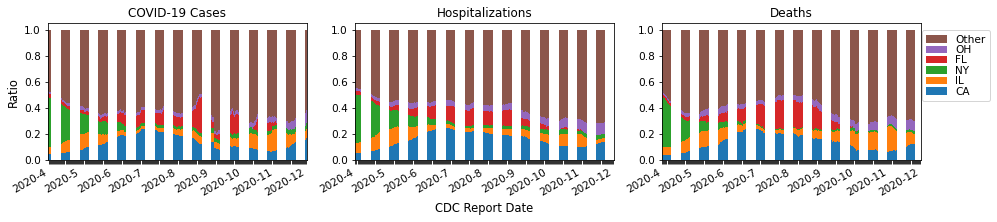

In [41]:
plt.rcParams['figure.figsize'] = [13, 3.2]

fig, ax = plt.subplots(1,3)
vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases','Hospitalizations', 'Deaths']

for i, v in enumerate(vrs):
    get_bar_chart(v, florida.copy(), time, '{}'.format(lbs[i]), ax[i], i, 'state')
    
handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.062,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('top_states.svg'), bbox_inches='tight')  

# Bar plots for age ratios

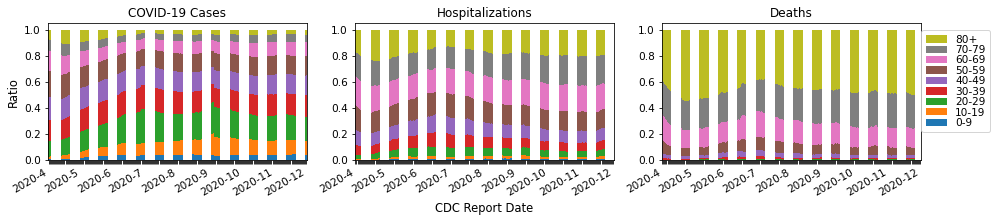

In [42]:
#smoothed
#plt.rcParams['figure.figsize'] = [16, 3.2]
plt.rcParams['figure.figsize'] = [13, 3.2]

fig, ax = plt.subplots(1,3)
#vrs = ['all'] #, 'Died', 'Hospitalized'] # 'Died'
#lbs = ['COVID-19 Cases','Deaths', 'Hospitalizations']

vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases','Hospitalizations', 'Deaths']

florida['Age_group']
for i, v in enumerate(vrs):
    
    get_bar_chart(v, florida[florida['Age_group'] != '_Unknown'].copy(), time, '{}'.format(lbs[i]), ax[i], i)
    
handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.062,0.85), borderaxespad=0.)
fig.savefig('img_country/{}'.format('age_ratios.svg'), bbox_inches='tight')  

# Female ratio

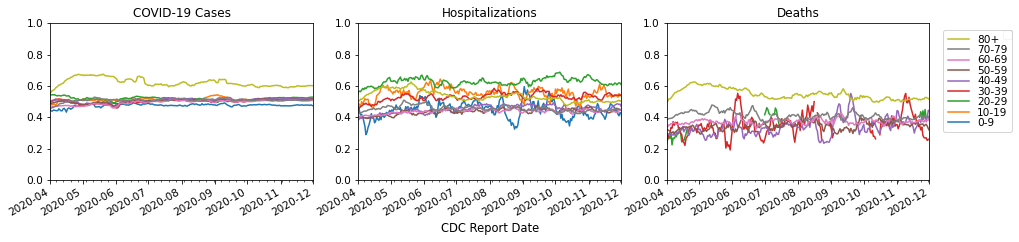

In [43]:
plt.rcParams['figure.figsize'] = [13, 3.2]

vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases', 'Hospitalizations','Deaths']
sv = ['all', 'hosp', 'death']
fig, ax = plt.subplots(1, 3)
plt.cla()

for i, v in enumerate(vrs):
    new_var = "f_{}".format(v)
    newdf[new_var] = 0
    newdf.loc[(newdf['Gender'] == 'Female') & (newdf[v] == 1), new_var] = 1
    df = get_groupby_rolling_df(newdf, grpvar, freq, new_var, time)
    df[new_var] = df['rolling sum']
    df_org = get_groupby_rolling_df(newdf, grpvar, freq, v, time)
    df[v] = df_org['rolling sum']
    df['female_prop'] = df[new_var] / df[v]
    cats = df[grpvar].cat.categories
    everylevel = pd.DataFrame(list(product(df.index.unique(), df[grpvar].cat.categories)), columns=[time, grpvar])
    df = df[df[v] >=5]
    df = df.merge(everylevel, on=[time, grpvar], how='outer')
    df.sort_values(by=time,inplace=True)
    df.index = df[time]
    df[grpvar] = df[grpvar].astype('category')
    df[grpvar].cat.reorder_categories(cats, inplace=True)
    df = remove_unkown(df, grpvar)
    p = df.groupby(grpvar)['female_prop'].plot(ax=ax[i], legend=False)

    graph_leg(p, '{}'.format(lbs[i]))
    ax[i].set_title("{}".format(lbs[i]))
    ax[i].set_xlabel("")
    ax[i].set_ylim(0,1)
    handles, labels = ax[2].get_legend_handles_labels()
    fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
    plt.tight_layout()
ax[1].set_xlabel('CDC Report Date')
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
fig.savefig('img_country/{}'.format('gender_age_female.svg'.format(sv[i])), bbox_inches='tight')  
